Import the libraries that will be used in the analysis.

In [38]:
#Integer division will return float value
from __future__ import division
#Import os to set working directory
import os as osvariable
#Set working directory
osvariable.chdir("C:/Users/Mustafa/Desktop/datamining/Credit_card")
#Import numpy for array operations
import numpy as np
#Suppress scientific notation for numpy
np.set_printoptions(suppress=True)
#Import pandas
import pandas as pd
#Import read_csv to read in csv files
from pandas import read_csv
#%matplotlib inline
%matplotlib inline
#Import plotting library
import matplotlib.pyplot as plt

In [39]:
#Read the csv file into 'default_data' data frame object
default_data = read_csv('default_of_credit_card_clients.csv')
#Take a look at the first 5 observations
print(default_data.head())

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

              ...              BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
0             ...                      0          0          0         0   
1             ...                   3272       3455       3261         0   
2             ...                  14331      14948      15549      1518   
3             ...                  28314      28959      29547      2000   
4             ...                  20940      19146      19131      2000   

   PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0       689  

In [40]:
#Set the unique observation identifier as the pandas dataframe index 
default_data = default_data.set_index(default_data['ID'])
#Remove the identifier variable
default_data = default_data.drop(['ID'],axis = 1)
#Look at the shape of the data frame
print(np.shape(default_data))

(30000, 24)


In [41]:
#Separate the response variable from the dataframe
y = pd.DataFrame(default_data['default payment next month'],columns = ['default payment next month'],index = default_data.index.values)
X = default_data.drop(['default payment next month'],axis = 1)
X = X.set_index(default_data.index.values)

In [42]:
#Before proceeding, we will convert all data types to numeric types
#Take a look at the number of different data types
print('number of types')
print(pd.value_counts(default_data.dtypes))

number of types
int64    24
dtype: int64


In [43]:
#All types are numeric.
#Take a look at the number of unique values for each variable
for varname in X.columns.values:
    print('Variable:',varname,' ',len(np.unique(X[varname])))

('Variable:', 'LIMIT_BAL', ' ', 81)
('Variable:', 'SEX', ' ', 2)
('Variable:', 'EDUCATION', ' ', 7)
('Variable:', 'MARRIAGE', ' ', 4)
('Variable:', 'AGE', ' ', 56)
('Variable:', 'PAY_0', ' ', 11)
('Variable:', 'PAY_2', ' ', 11)
('Variable:', 'PAY_3', ' ', 11)
('Variable:', 'PAY_4', ' ', 11)
('Variable:', 'PAY_5', ' ', 10)
('Variable:', 'PAY_6', ' ', 10)
('Variable:', 'BILL_AMT1', ' ', 22723)
('Variable:', 'BILL_AMT2', ' ', 22346)
('Variable:', 'BILL_AMT3', ' ', 22026)
('Variable:', 'BILL_AMT4', ' ', 21548)
('Variable:', 'BILL_AMT5', ' ', 21010)
('Variable:', 'BILL_AMT6', ' ', 20604)
('Variable:', 'PAY_AMT1', ' ', 7943)
('Variable:', 'PAY_AMT2', ' ', 7899)
('Variable:', 'PAY_AMT3', ' ', 7518)
('Variable:', 'PAY_AMT4', ' ', 6937)
('Variable:', 'PAY_AMT5', ' ', 6897)
('Variable:', 'PAY_AMT6', ' ', 6939)


In [44]:
#Get the list of categorical variables and the continuous variables.
#We will treat PAY_0, PAY_2... variables as continuous. These are history of past 
#payment. The values of these parameters represent the number of months
#the payment was delayed. 
categorical_variables = np.array(['SEX', 'EDUCATION', 'MARRIAGE'])
continuous_variables = [variable for variable in X.columns.values if variable not in categorical_variables]

In [45]:
#Create the dictionary that will hold the categorical variable names
#as the key and the categories as values. The order of the values
#gives their code
labels_dictionary = {}
for varname in categorical_variables:
    labels_dictionary[varname] = pd.Categorical(X[varname]).categories 
    print(varname,labels_dictionary[varname])
    X[varname] = pd.Categorical(X[varname]).codes

#Print dictionary
print(labels_dictionary)

('SEX', Int64Index([1, 2], dtype='int64'))
('EDUCATION', Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64'))
('MARRIAGE', Int64Index([0, 1, 2, 3], dtype='int64'))
{'EDUCATION': Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64'), 'MARRIAGE': Int64Index([0, 1, 2, 3], dtype='int64'), 'SEX': Int64Index([1, 2], dtype='int64')}


In [46]:
#Drop variables whose variance is below a threshold.
#VarianceThreshold function returns the index of variables
#that have a variance higher than the threshold
#The VarianceThreshold with an empty argument only keeps
#variables with nonzero variance
#Create the VarianceThreshold object with the threshold
select_variance = VarianceThreshold()
#Fit the data
select_variance.fit(X)
#Print the names of the variables with 0 variance
#Use ~ sign before the boolean array to get the names 
#select_variance.fit assigns a value of True to variables with variances
#higher than the threshold to keep them, but we want to look at the 
#names of the variables with variances below the threshold
print('Zero variance variables')
print(X.columns.values[~select_variance.get_support(indices = False)])

Zero variance variables
[]


In [47]:
#Return a dataframe that only includes variables 
#with a higher than the threshold variance
#fit_transform returns an ndarray, convert it back to 
#a dataframe. Keep the column names for the variables which will be preserved
column_names = X.columns.values[select_variance.get_support(indices = False)]
X = pd.DataFrame(select_variance.fit_transform(X),columns = column_names,index = default_data.index.values)

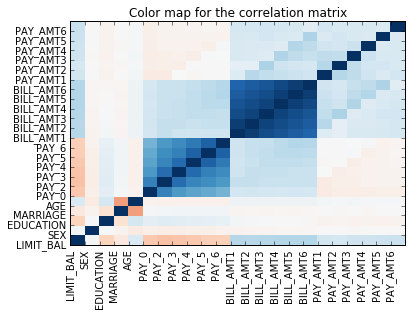

In [48]:
#Get the correlation matrix in a dataframe
correlationfactor = np.corrcoef(X.T)
#Draw the color map for the correlation matrix to better visualize
#highly correlated variables 
dy = 1
dx = 1
y_corr, x_corr = np.mgrid[slice(0, X.shape[1] + dy, dy),
                slice(0, X.shape[1] + dx, dx)]
correlationfactor_min, correlationfactor_max = -np.abs(correlationfactor).max(), np.abs(correlationfactor).max()
plt.figure()
plt.xticks(range(X.shape[1]), X.columns.values, rotation='vertical')
plt.yticks(range(X.shape[1]), X.columns.values)
plt.pcolor(x_corr, y_corr, np.array(correlationfactor), cmap='RdBu', vmin=correlationfactor_min, vmax=correlationfactor_max)
plt.title('Color map for the correlation matrix')
plt.show()
plt.savefig('correlation_matrix')

In [49]:
correlationfactor = pd.DataFrame(np.corrcoef(X.T),columns = X.columns.values)
#Create a set of variables which are not higly correlated
#with at least one other variable
#We will retain these variables
correlation_below_threshold_set = set()
#Set the correlation_threshold
correlation_threshold = 0.90
column_index = 0
#For each variable in the dataset
for i in range(np.shape(X)[1]):
    #Add the variable to the set
    correlation_below_threshold_set.add(X.columns.values[i])
    #For each other variable in the dataset
    column_index = column_index + 1
    for j in range(column_index):
        #If the variable is not the current variable, and if the 
        #correlation is higher than the threshold, discard the variable
        #from the set        
        if (i<>j) and (correlationfactor.iloc[i,j] > correlation_threshold):
            print('High correlation:',correlationfactor.columns.values[i],
                    correlationfactor.columns.values[j],' %0.03f' % correlationfactor.iloc[i,j])
            correlation_below_threshold_set.discard(X.columns.values[i])

('High correlation:', 'BILL_AMT2', 'BILL_AMT1', ' 0.951')
('High correlation:', 'BILL_AMT3', 'BILL_AMT2', ' 0.928')
('High correlation:', 'BILL_AMT4', 'BILL_AMT3', ' 0.924')
('High correlation:', 'BILL_AMT5', 'BILL_AMT4', ' 0.940')
('High correlation:', 'BILL_AMT6', 'BILL_AMT4', ' 0.901')
('High correlation:', 'BILL_AMT6', 'BILL_AMT5', ' 0.946')


In [50]:
#Print the set of variables with correlation above a threshold
print(correlation_below_threshold_set)

set(['AGE', 'SEX', 'PAY_6', 'PAY_4', 'PAY_5', 'PAY_2', 'PAY_3', 'PAY_0', 'BILL_AMT1', 'PAY_AMT6', 'PAY_AMT5', 'PAY_AMT4', 'PAY_AMT3', 'PAY_AMT2', 'PAY_AMT1', 'LIMIT_BAL', 'MARRIAGE', 'EDUCATION'])


In [51]:
#Check the correlation of each variable with the outcome
correlations = []  
for i in range(np.shape(X)[1]):
    correlations.append(np.corrcoef(X.iloc[:,i],np.ravel(y))[0,1])

In [52]:
#Sort correlations with the outcome and print
correlations_df = pd.DataFrame.from_items([('Variable_name',X.columns.values),('Correlation',correlations)])
correlations_df = correlations_df.sort_values(by = 'Correlation', axis = 0, ascending = False)
pd.DataFrame(correlations_df).to_csv('Correlations.csv',index = False)
print(correlations_df)

   Variable_name  Correlation
5          PAY_0     0.324794
6          PAY_2     0.263551
7          PAY_3     0.235253
8          PAY_4     0.216614
9          PAY_5     0.204149
10         PAY_6     0.186866
2      EDUCATION     0.028006
4            AGE     0.013890
16     BILL_AMT6    -0.005372
15     BILL_AMT5    -0.006760
14     BILL_AMT4    -0.010156
13     BILL_AMT3    -0.014076
12     BILL_AMT2    -0.014193
11     BILL_AMT1    -0.019644
3       MARRIAGE    -0.024339
1            SEX    -0.039961
22      PAY_AMT6    -0.053183
21      PAY_AMT5    -0.055124
19      PAY_AMT3    -0.056250
20      PAY_AMT4    -0.056827
18      PAY_AMT2    -0.058579
17      PAY_AMT1    -0.072929
0      LIMIT_BAL    -0.153520


In [53]:
#Summarize age by patient status (outcome)
#Get mean age by status
#Perform ttest on the difference of continuous variables by response
#and plot the histogram of continuous variables by payment status
print('Mean difference by payment status')
for varname in continuous_variables:
    ttest_status_t,ttest_status_p  = stats.ttest_ind(X.loc[(np.ravel(y) == 0),[varname]],X.loc[(np.ravel(y) == 1),[varname]],equal_var = False)
    print(varname,'t-statistic: %0.03f' % ttest_status_t,'p-value %0.03f' % ttest_status_p)
    #Histogram of age by default status
    plt.figure()
    X[(np.ravel(y) == 0)][varname].hist(bins = 20, alpha = 0.5, label = 'Paid')
    X[(np.ravel(y) == 1)][varname].hist(bins = 20, alpha = 0.5, label = 'Default')
    plt.title(str(varname) + ' values by payment status')
    plt.ylabel('Frequency')
    plt.xlabel(varname)
    plt.legend(loc = 'upper right')
    plt.savefig(varname)
    plt.close()

Mean difference by payment status
('LIMIT_BAL', 't-statistic: 28.952', 'p-value 0.000')
('AGE', 't-statistic: -2.320', 'p-value 0.020')
('PAY_0', 't-statistic: -48.619', 'p-value 0.000')
('PAY_2', 't-statistic: -38.695', 'p-value 0.000')
('PAY_3', 't-statistic: -34.536', 'p-value 0.000')
('PAY_4', 't-statistic: -31.021', 'p-value 0.000')
('PAY_5', 't-statistic: -28.888', 'p-value 0.000')
('PAY_6', 't-statistic: -26.702', 'p-value 0.000')
('BILL_AMT1', 't-statistic: 3.398', 'p-value 0.001')
('BILL_AMT2', 't-statistic: 2.447', 'p-value 0.014')
('BILL_AMT3', 't-statistic: 2.459', 'p-value 0.014')
('BILL_AMT4', 't-statistic: 1.759', 'p-value 0.079')
('BILL_AMT5', 't-statistic: 1.162', 'p-value 0.245')
('BILL_AMT6', 't-statistic: 0.930', 'p-value 0.352')
('PAY_AMT1', 't-statistic: 17.513', 'p-value 0.000')
('PAY_AMT2', 't-statistic: 14.817', 'p-value 0.000')
('PAY_AMT3', 't-statistic: 11.893', 'p-value 0.000')
('PAY_AMT4', 't-statistic: 12.222', 'p-value 0.000')
('PAY_AMT5', 't-statistic: 1

In [54]:
#For categorical variables, whose name we saved in labels_dictionary,
#create dummy variables, remove the first dummy variable to make it the  
#reference category and remove the original variables
for key in labels_dictionary:
    dummy_variables = pd.get_dummies(X[key])
    removed_reference = False
    for var in dummy_variables:
        if removed_reference == False:
            removed_reference = True
        else:
            #Combine the variable name with the category
            varname = str(key) + '_' + str(labels_dictionary.get(key)[var])
            X[varname] = dummy_variables[var]

In [55]:
#Remove the variables for which we have created dummy variables
X = X.drop(list(labels_dictionary.keys()), axis = 1)
#Write the dataframes that we will use in the analysis
X.to_csv('X.csv',index = False)
y.to_csv('y.csv',index = False)